In [2]:
import pandas as pd
from datetime import datetime

In [3]:
df=pd.read_csv(r"ETH_1h.csv")
#we can specify the format int top also
d_parser=lambda x: datetime.strptime(x,'%Y-%m-%d %I-%p')
df=pd.read_csv(r"ETH_1h.csv",parse_dates=['Date'],date_parser=d_parser)
df.head()

C:\Users\matet\AppData\Local\Temp\ipykernel_9012\4008453092.py:4: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df=pd.read_csv(r"ETH_1h.csv",parse_dates=['Date'],date_parser=d_parser)


,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71


In [5]:
df.describe()

,Open,High,Low,Close,Volume
count,23674.000000,23674.000000,23674.000000,23674.000000,2.367400e+04
mean,324.933372,327.317109,322.255521,324.926601,2.011035e+06
std,236.189068,238.539115,233.365042,236.192308,3.673646e+06
min,81.290000,82.000000,80.600000,81.290000,0.000000e+00
25%,171.522500,172.472500,170.500000,171.512500,3.993914e+05
50%,229.745000,231.725000,228.100000,229.725000,9.146454e+05
75%,402.797500,405.427500,400.030000,402.797500,2.098111e+06
max,1418.610000,1419.960000,1388.990000,1418.610000,8.569790e+07


In [8]:
df['Date'].dtype

dtype('O')

In [9]:
df.loc[0,'Date']

'2020-03-13 08-PM'

In [4]:
df.loc[0,'Date'].day_name() #right the date column is passed as string not as date datatype

'Friday'

In [11]:
df['Date']=pd.to_datetime(df['Date'])

C:\Users\matet\AppData\Local\Temp\ipykernel_7620\3023999556.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date']=pd.to_datetime(df['Date'])


DateParseError: Unknown datetime string format, unable to parse: 2020-03-13 08-PM, at position 0

In [12]:
df['Date']=pd.to_datetime(df['Date'],format='%Y-%m-%d %I-%p')#if we get above error we have to specify the custom format

In [14]:
df['Date']

0       2020-03-13 20:00:00
1       2020-03-13 19:00:00
2       2020-03-13 18:00:00
3       2020-03-13 17:00:00
4       2020-03-13 16:00:00
                ...        
23669   2017-07-01 15:00:00
23670   2017-07-01 14:00:00
23671   2017-07-01 13:00:00
23672   2017-07-01 12:00:00
23673   2017-07-01 11:00:00
Name: Date, Length: 23674, dtype: datetime64[ns]

In [15]:
df.loc[0,'Date'].day_name()

'Friday'

In [8]:
df['Date'].dt.day_name()# using dt is similar to how we use str day_name() give us the name of day on that particular date

0          Friday
1          Friday
2          Friday
3          Friday
4          Friday
           ...   
23669    Saturday
23670    Saturday
23671    Saturday
23672    Saturday
23673    Saturday
Name: Date, Length: 23674, dtype: object

In [11]:
df['DayOfWeek']=df['Date'].dt.day_name()

In [12]:
df

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday
...,...,...,...,...,...,...,...,...
23669,2017-07-01 15:00:00,ETHUSD,265.74,272.74,265.00,272.57,1500282.55,Saturday
23670,2017-07-01 14:00:00,ETHUSD,268.79,269.90,265.00,265.74,1702536.85,Saturday
23671,2017-07-01 13:00:00,ETHUSD,274.83,274.93,265.00,268.79,3010787.99,Saturday
23672,2017-07-01 12:00:00,ETHUSD,275.01,275.01,271.00,274.83,824362.87,Saturday


In [17]:
# to see the earliset date
k=df['Date'].min()
k1=df['Date'].max()# to see the earliset date

In [19]:
# we can subtract to see the time beteen dates
k1-k# to see the difference between dates



Timedelta('986 days 09:00:00')

In [28]:
#data only for 2020
filt=((df['Date']>='2019-01-01') & (df['Date']<='2020-01-01'))
df.loc[filt,'Date']

1748    2020-01-01 00:00:00
1749    2019-12-31 23:00:00
1750    2019-12-31 22:00:00
1751    2019-12-31 21:00:00
1752    2019-12-31 20:00:00
                ...        
10504   2019-01-01 04:00:00
10505   2019-01-01 03:00:00
10506   2019-01-01 02:00:00
10507   2019-01-01 01:00:00
10508   2019-01-01 00:00:00
Name: Date, Length: 8761, dtype: datetime64[ns]

In [30]:
df.set_index('Date',inplace=True)

In [31]:
df

,Symbol,Open,High,Low,Close,Volume,DayOfWeek
Date,,,,,,,
2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday
...,...,...,...,...,...,...,...
2017-07-01 15:00:00,ETHUSD,265.74,272.74,265.00,272.57,1500282.55,Saturday
2017-07-01 14:00:00,ETHUSD,268.79,269.90,265.00,265.74,1702536.85,Saturday
2017-07-01 13:00:00,ETHUSD,274.83,274.93,265.00,268.79,3010787.99,Saturday


In [50]:
df=df.sort_index()


In [53]:
df.loc['2020-01':'2020-0']#you need to sort before we do the slicing

,Symbol,Open,High,Low,Close,Volume,DayOfWeek
Date,,,,,,,
2017-07-01 11:00:00,ETHUSD,279.98,279.99,272.10,275.01,679358.87,Saturday
2017-07-01 12:00:00,ETHUSD,275.01,275.01,271.00,274.83,824362.87,Saturday
2017-07-01 13:00:00,ETHUSD,274.83,274.93,265.00,268.79,3010787.99,Saturday
2017-07-01 14:00:00,ETHUSD,268.79,269.90,265.00,265.74,1702536.85,Saturday
2017-07-01 15:00:00,ETHUSD,265.74,272.74,265.00,272.57,1500282.55,Saturday
...,...,...,...,...,...,...,...
2017-12-31 19:00:00,ETHUSD,739.89,743.75,739.88,743.42,2363924.30,Sunday
2017-12-31 20:00:00,ETHUSD,743.42,750.11,743.41,750.11,3330359.12,Sunday
2017-12-31 21:00:00,ETHUSD,750.11,751.00,743.96,746.08,2908764.02,Sunday


In [58]:
df['2020-01':'2020-02']['Close'].mean()

np.float64(195.1655902777778)

In [68]:
#high for each day
df['2020-01-01':'2020-01-02']['High'].max()


132.68

In [70]:
k=df['High'].resample('D').max()#days right now it is hourly W-> Week

In [71]:
k['2020-01-01']

np.float64(132.68)

In [85]:
import matplotlib.pyplot as plt

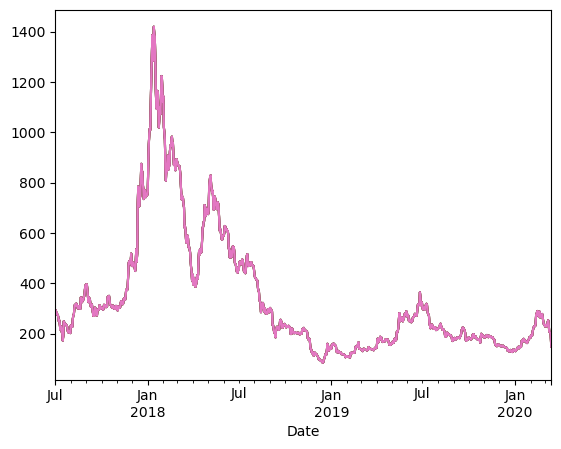

In [86]:
k.plot()
plt.show()

In [89]:
#resample mulitiple columns with multple aggregation
df.resample('W').agg({'Close':'mean','High':'max','Low':'min','Volume':'sum'})#column name:aggregation values

,Close,High,Low,Volume
Date,,,,
2017-07-02,268.202162,293.73,253.23,8.084631e+07
2017-07-09,261.062083,285.00,231.25,2.246746e+08
2017-07-16,195.698393,240.33,130.26,5.017750e+08
2017-07-23,212.783750,249.40,153.25,7.221637e+08
2017-07-30,203.309524,229.99,178.03,2.657305e+08
...,...,...,...,...
2020-02-16,255.198452,290.00,216.31,3.912867e+08
2020-02-23,265.321905,287.13,242.36,3.067838e+08
2020-03-01,236.373988,278.13,209.26,3.693920e+08
